In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
diabetis = pd.read_csv("datasets_228_482_diabetes.csv")

In [3]:
diabetis.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetis.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetis.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
diabetis['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [8]:
#Age and Pregnancies seem okay
diabetis[(diabetis['Age'] < 18) & (diabetis['Pregnancies'] > 0)].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetis.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diabetis.shape

(768, 9)

In [11]:
diabetis.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
#Pregnancies is Okay to have zero but Glucose, BloodPressure, SkinThickness, Insulin and BMI should have values
diabetis[diabetis['Glucose'] == 0]['Glucose']

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

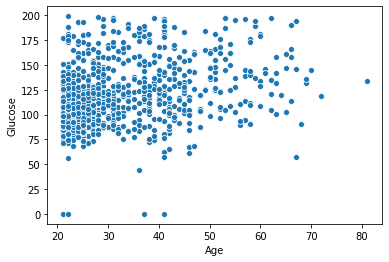

In [13]:
sns.scatterplot(x="Age", y='Glucose', data=diabetis)

In [14]:
#No correlation between Age and Glucose, so replace zero's with mean on Glucose.
diabetis['Glucose'] = diabetis['Glucose'].replace(0,diabetis['Glucose'].mean())

In [15]:
diabetis.iloc[502]

Pregnancies                   6.000000
Glucose                     120.894531
BloodPressure                68.000000
SkinThickness                41.000000
Insulin                       0.000000
BMI                          39.000000
DiabetesPedigreeFunction      0.727000
Age                          41.000000
Outcome                       1.000000
Name: 502, dtype: float64

In [16]:
diabetis.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

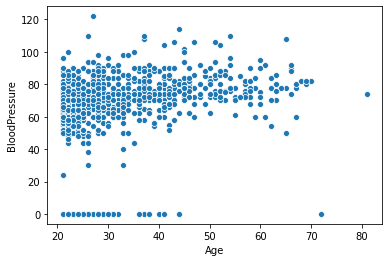

In [17]:
sns.scatterplot(x="Age", y='BloodPressure', data=diabetis)

In [18]:
#No correlation between Age and BloodPressure, so replace zero's with mean on BloodPressure.
diabetis['BloodPressure'] = diabetis['BloodPressure'].replace(0,diabetis['BloodPressure'].mean())

In [19]:
diabetis.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

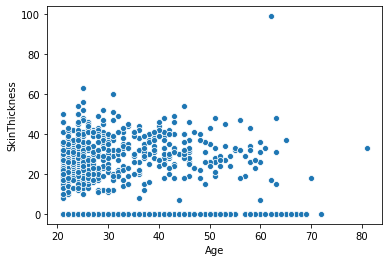

In [20]:
sns.scatterplot(x="Age", y='SkinThickness', data=diabetis)

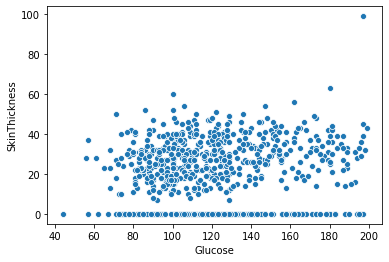

In [21]:
sns.scatterplot(x="Glucose", y='SkinThickness', data=diabetis)

In [22]:
#No correlation between Age and SkinThickness, Glucose and SkinThickness so replace zero's with mean on SkinThickness.
diabetis['SkinThickness'] = diabetis['SkinThickness'].replace(0,diabetis['SkinThickness'].mean())

In [23]:
diabetis.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

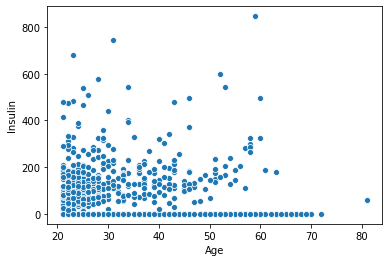

In [24]:
sns.scatterplot(x="Age", y='Insulin', data=diabetis)

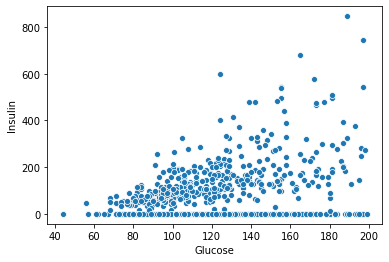

In [25]:
sns.scatterplot(x="Glucose", y='Insulin', data=diabetis)

In [26]:
#Glucose and Insulin having negative correlation, so we can impute empty Insulin with Insulin average values
# with respect to Glucose bins
diabetis.groupby('Glucose').mean()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,,,,,,,,
44.0,5.000000,62.000000,20.536458,0.000000,25.000000,0.587000,36.000000,0.00
56.0,2.000000,56.000000,28.000000,45.000000,24.200000,0.332000,22.000000,0.00
57.0,4.500000,70.000000,28.768229,0.000000,27.250000,0.415500,54.000000,0.00
61.0,3.000000,82.000000,28.000000,0.000000,34.400000,0.243000,46.000000,0.00
62.0,7.000000,78.000000,20.536458,0.000000,32.600000,0.391000,41.000000,0.00
...,...,...,...,...,...,...,...,...
195.0,6.500000,70.000000,26.768229,72.500000,28.000000,0.245500,43.000000,1.00
196.0,5.333333,80.666667,28.512153,176.333333,37.933333,0.643667,42.333333,1.00
197.0,4.000000,71.000000,50.884115,321.750000,31.950000,1.063250,46.250000,0.75


In [27]:
pd.cut(diabetis['Glucose'], bins=10).value_counts()

(90.5, 106.0]     163
(106.0, 121.5]    152
(121.5, 137.0]    133
(75.0, 90.5]       85
(137.0, 152.5]     80
(152.5, 168.0]     58
(168.0, 183.5]     40
(183.5, 199.0]     32
(59.5, 75.0]       21
(43.845, 59.5]      4
Name: Glucose, dtype: int64

In [28]:
diabetis[(diabetis['Glucose'] >= 90) & (diabetis['Glucose'] <=106)]['Glucose'].mean()

98.47126436781609

In [29]:
def cal_insulin(cols):
    insulin = cols[0]
    glucose = cols[1]
    if insulin == 0:
        if glucose > 90 and glucose <= 106:
            return diabetis[(diabetis['Glucose'] > 90) & (diabetis['Glucose'] <=106)]['Insulin'].mean()
        elif glucose > 106 and glucose <= 121:
            return diabetis[(diabetis['Glucose'] > 106) & (diabetis['Glucose'] <=121)]['Insulin'].mean()
        elif glucose > 121 and glucose <= 137:
            return diabetis[(diabetis['Glucose'] > 121) & (diabetis['Glucose'] <=137)]['Insulin'].mean()
        elif glucose > 137 and glucose <= 152:
            return diabetis[(diabetis['Glucose'] > 137) & (diabetis['Glucose'] <=152)]['Insulin'].mean()
        elif glucose > 152 and glucose <= 168:
            return diabetis[(diabetis['Glucose'] > 152) & (diabetis['Glucose'] <=168)]['Insulin'].mean()
        elif glucose > 168 and glucose <= 183:
            return diabetis[(diabetis['Glucose'] > 168) & (diabetis['Glucose'] <=183)]['Insulin'].mean()
        elif glucose > 183 and glucose <= 199:
            return diabetis[(diabetis['Glucose'] > 183) & (diabetis['Glucose'] <=199)]['Insulin'].mean()
        elif glucose > 75 and glucose <= 90:
            return diabetis[(diabetis['Glucose'] > 75) & (diabetis['Glucose'] <=90)]['Insulin'].mean()
        elif glucose > 59 and glucose <= 75:
            return diabetis[(diabetis['Glucose'] > 59) & (diabetis['Glucose'] <=75)]['Insulin'].mean()
        elif glucose > 43 and glucose <= 59:
            return diabetis[(diabetis['Glucose'] > 43) & (diabetis['Glucose'] <=59)]['Insulin'].mean()
        else:
            return diabetis['Insulin'].mean()
    else:
        return insulin
        

In [30]:
diabetis['Insulin'].mean()

79.79947916666667

In [31]:
diabetis['Insulin'] = diabetis[['Insulin','Glucose']].apply(cal_insulin,axis=1)

In [32]:
diabetis['Insulin'].mean()

117.58711259990349

In [33]:
diabetis.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [34]:
diabetis.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.003677,0.017683,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.565594,0.235147,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.054661,0.242656,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.247372,0.501131,0.154961,0.026423,0.175026
Insulin,-0.003677,0.565594,0.054661,0.247372,1.000000,0.235654,0.173395,0.083915,0.259655
BMI,0.017683,0.235147,0.242656,0.501131,0.235654,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.173395,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.083915,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.259655,0.292695,0.173844,0.238356,1.000000


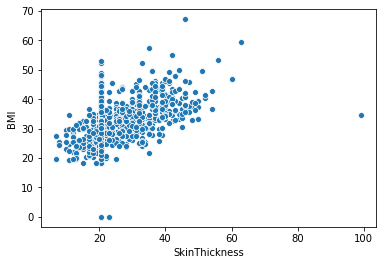

In [35]:
sns.scatterplot(x="SkinThickness", y='BMI', data=diabetis)

In [36]:
#SkinThickness has the correlation with BMI
diabetis[diabetis['BMI'] ==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.000000,20.536458,93.157895,0.0,0.232,54,1
49,7,105.0,69.105469,20.536458,57.042945,0.0,0.305,24,0
60,2,84.0,69.105469,20.536458,35.047059,0.0,0.304,21,0
81,2,74.0,69.105469,20.536458,20.761905,0.0,0.102,22,0
145,0,102.0,75.000000,23.000000,57.042945,0.0,0.572,21,0
371,0,118.0,64.000000,23.000000,89.000000,0.0,1.731,21,0
426,0,94.0,69.105469,20.536458,57.042945,0.0,0.256,25,0
494,3,80.0,69.105469,20.536458,35.047059,0.0,0.174,22,0
522,6,114.0,69.105469,20.536458,52.828947,0.0,0.189,26,0
684,5,136.0,82.000000,20.536458,93.157895,0.0,0.640,69,0


In [37]:
diabetis[(diabetis['SkinThickness'] > 20) & (diabetis['SkinThickness'] <=23)]['BMI'].mean()

29.889454545454534

In [38]:
diabetis['BMI'] = diabetis['BMI'].replace(0,diabetis[(diabetis['SkinThickness'] > 20) & (diabetis['SkinThickness'] <=23)]['BMI'].mean())

In [39]:
diabetis.iloc[706]

Pregnancies                  10.000000
Glucose                     115.000000
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      52.828947
BMI                          29.889455
DiabetesPedigreeFunction      0.261000
Age                          30.000000
Outcome                       1.000000
Name: 706, dtype: float64

In [40]:
diabetis.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [41]:
diabetis.shape

(768, 9)

In [42]:
train = diabetis[:700]
validation = diabetis[700:]

In [43]:
train.shape

(700, 9)

In [44]:
validation.shape

(68, 9)

In [45]:
X = train.drop(['Outcome'],axis=1)
y= train['Outcome']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=101)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log = LogisticRegression()

In [50]:
log.fit(X_train,y_train)

C:\Users\SarathBabuMallam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
log.intercept_

array([-9.29188928])

In [52]:
log.coef_

array([[ 0.15639206,  0.04110251, -0.01313112, -0.00205767, -0.0014408 ,
         0.09152134,  1.25749223,  0.01294899]])

In [53]:
predict = log.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [55]:
print(accuracy_score(y_test,predict))

0.7571428571428571


In [56]:
print(confusion_matrix(y_test,predict))

[[77 15]
 [19 29]]


In [57]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        92
           1       0.66      0.60      0.63        48

    accuracy                           0.76       140
   macro avg       0.73      0.72      0.72       140
weighted avg       0.75      0.76      0.75       140



In [58]:
print(roc_auc_score(y_test,predict))

0.7205615942028984


In [59]:
pred_prob = log.predict_proba(X_test)

In [60]:
pred_prob[::,0]

array([0.90190899, 0.86590834, 0.31923713, 0.96352358, 0.61088213,
       0.2433416 , 0.66617303, 0.94921859, 0.8236316 , 0.33933609,
       0.87279091, 0.36095588, 0.97892011, 0.68003803, 0.96195072,
       0.84912473, 0.93877152, 0.60459097, 0.63037983, 0.96229387,
       0.92568924, 0.92894623, 0.68945154, 0.80751078, 0.12856344,
       0.94256697, 0.9112479 , 0.71677653, 0.28276234, 0.08482527,
       0.52133817, 0.18760574, 0.69677272, 0.91359646, 0.84061783,
       0.55690216, 0.79105837, 0.14698469, 0.2175978 , 0.50071321,
       0.89779584, 0.84394633, 0.94278805, 0.87178142, 0.92389744,
       0.80775251, 0.65633195, 0.94686941, 0.79537573, 0.69272062,
       0.2168883 , 0.48907295, 0.76587392, 0.73950271, 0.36270237,
       0.97743336, 0.19972603, 0.95997401, 0.1363439 , 0.95945365,
       0.28266982, 0.91659043, 0.94752603, 0.53423433, 0.91281302,
       0.915658  , 0.24545899, 0.77748536, 0.97299679, 0.55128226,
       0.64771237, 0.71004075, 0.35959813, 0.78336529, 0.11542

In [61]:
predict

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [62]:
pred_prob

array([[0.90190899, 0.09809101],
       [0.86590834, 0.13409166],
       [0.31923713, 0.68076287],
       [0.96352358, 0.03647642],
       [0.61088213, 0.38911787],
       [0.2433416 , 0.7566584 ],
       [0.66617303, 0.33382697],
       [0.94921859, 0.05078141],
       [0.8236316 , 0.1763684 ],
       [0.33933609, 0.66066391],
       [0.87279091, 0.12720909],
       [0.36095588, 0.63904412],
       [0.97892011, 0.02107989],
       [0.68003803, 0.31996197],
       [0.96195072, 0.03804928],
       [0.84912473, 0.15087527],
       [0.93877152, 0.06122848],
       [0.60459097, 0.39540903],
       [0.63037983, 0.36962017],
       [0.96229387, 0.03770613],
       [0.92568924, 0.07431076],
       [0.92894623, 0.07105377],
       [0.68945154, 0.31054846],
       [0.80751078, 0.19248922],
       [0.12856344, 0.87143656],
       [0.94256697, 0.05743303],
       [0.9112479 , 0.0887521 ],
       [0.71677653, 0.28322347],
       [0.28276234, 0.71723766],
       [0.08482527, 0.91517473],
       [0.

In [63]:
pred_new = np.where(pred_prob[:,0]>=0.55,0,1)
print(accuracy_score(y_test,pred_new))
print(confusion_matrix(y_test,pred_new))
print(roc_auc_score(y_test,pred_new))

0.7357142857142858
[[74 18]
 [19 29]]
0.7042572463768115


In [64]:
pred_new = np.where(pred_prob[:,0]>=0.45,0,1)
print(accuracy_score(y_test,pred_new))
print(confusion_matrix(y_test,pred_new))
print(roc_auc_score(y_test,pred_new))

0.7642857142857142
[[80 12]
 [21 27]]
0.7160326086956522


In [65]:
pred_new = np.where(pred_prob[:,0]>=0.5,0,1)
print(accuracy_score(y_test,pred_new))
print(confusion_matrix(y_test,pred_new))
print(roc_auc_score(y_test,pred_new))

0.7571428571428571
[[77 15]
 [19 29]]
0.7205615942028984


In [66]:
#We can go with 0 to 0.45 for Zero and 0.45 to 1 for One

(68, 9)

In [ ]:
#Validation process
validation.shape

In [67]:
validation_X = validation.drop(['Outcome'],axis=1)
validation_y= validation['Outcome']

In [68]:
predict_valid = log.predict(validation_X)

In [69]:
print(accuracy_score(validation_y,predict_valid))
print(confusion_matrix(validation_y,predict_valid))
print(roc_auc_score(validation_y,predict_valid))

0.8235294117647058
[[40  1]
 [11 16]]
0.7841011743450768


In [70]:
pred_prob_valid = log.predict_proba(validation_X)

In [76]:
pred_valid_new = np.where(pred_prob_valid[:,0]>=0.45,0,1)
print(accuracy_score(validation_y,pred_valid_new))
print(confusion_matrix(validation_y,pred_valid_new))
print(roc_auc_score(validation_y,pred_valid_new))

0.8235294117647058
[[40  1]
 [11 16]]
0.7841011743450768
